 1.CORRELATION

Correlation Between Features In The Datase:

Data Correlation: Is a way to understand the relationship between multiple variables and attributes in your dataset. Using Correlation, you can get some insights such as: One or multiple attributes depend on another attribute or a cause for another attribute.

there are theree types of correlations
    1.personal's coefficient
    2.spearman's coefficient
    3.kendall coeffcient                                                     

Two Strong Correlation:

The rule of correlation coefficients,the strongest correlation is considered when the value is closest to +1 (positive correlation) or -1 (negative correlation). A positive correlation coefficient indicates that the value of one variable depends on the other variable directly.


2.OUTLIERS


Which feature has more outliers:

Outliers can also come in different flavours, depending on the environment: point outliers, contextual outliers, or collective outliers.
Point outliers are single data points that lay far from the rest of the distribution. Contextual outliers can be noise in data, such as punctuation
symbols when realizing text analysis or background noise signal when doing speech recognition. Collective outliers can be subsets of novelties in
data such as a signal that may indicate the discovery of new phenomena.


In [ ]:
import sklearn
from sklearn.datasets import load_boston
import pandas as pd
import matplotlib.pyplot as plt

bos_hou = load_boston()

column_name = bos_hou.feature_names
df_boston = pd.DataFrame(bos_hou.data)
df_boston.columns = column_name
df_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


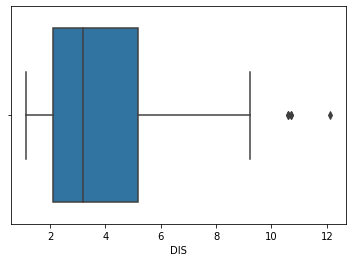

In [ ]:
import seaborn as sns
sns.boxplot(df_boston['DIS'])


In [ ]:
print(np.where(df_boston['DIS']>10))


(array([351, 352, 353, 354, 355]),)


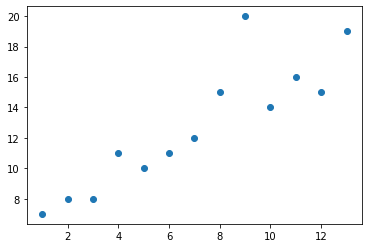

In [ ]:
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
 
X = [1,2,3,4,5,6,7,8,9,10,11,12,13]
Y = [7,8,8,11,10,11,12,15,20,14,16,15,19]

plt.scatter(X,Y)
plt.show()


3.DIABETES


In [ ]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        df= pd.read_csv('/kaggle/input/diabetes-dataset/diabetes2.csv')
        df.head()
        df.info()
        df.describe()
        sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
        sns.countplot(x='Outcome',data=df)
        sns.distplot(df['Age'].dropna(),kde=True)
        df.corr()
        sns.heatmap(df.corr())
        sns.pairplot(df)
        plt.subplots(figsize=(20,15))
        sns.boxplot(x='Age', y='BMI', data=df)
        x = df.drop('Outcome',axis=1)
        y = df['Outcome']
        from sklearn.model_selection import train_test_split
        x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=101)
        from sklearn.linear_model import LogisticRegression
        logmodel = LogisticRegression()
        logmodel.fit(x_train,y_train)
        predictions = logmodel.predict(x_test)
        from sklearn.metrics import classification_report
        print(classification_report(y_test,predictions))
        from sklearn.metrics import confusion_matrix
        confusion_matrix(y_test,predictions)